In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.insert(0, "/notebooks/")
from fastai.imports import *

In [2]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = "/notebooks/data/celeb/"
IMG_PATH = "/notebooks/data/celeb/img_align_celeba/"
sz=224

In [4]:
files = os.listdir(f'{IMG_PATH}')[:5]

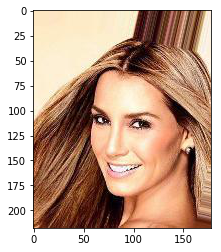

In [5]:
img = plt.imread(f'{IMG_PATH}{files[0]}')
plt.imshow(img);

In [6]:
img.shape

(218, 178, 3)

In [7]:
from courses.dl1.planet import f2

In [8]:
metrics=[f2]
f_model = resnet34

In [9]:
short_label_csv = f'/notebooks/notebook/projects/celeb/short_final.csv'

In [10]:
label_csv = f'/notebooks/notebook/projects/celeb/final.csv'

In [11]:
n = len(list(open(short_label_csv)))-1
val_idxs = get_cv_idxs(n)

In [12]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_basic, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'img_align_celeba', short_label_csv, tfms=tfms, val_idxs=val_idxs)

In [13]:
data = get_data(256)

In [14]:
x,y = next(iter(data.val_dl))

In [15]:
y


    0     1     1  ...      0     0     1
    0     0     1  ...      1     0     1
    0     1     1  ...      0     0     1
       ...          ⋱          ...       
    0     0     0  ...      0     0     1
    0     0     0  ...      0     0     1
    0     0     1  ...      0     0     1
[torch.cuda.FloatTensor of size 64x40 (GPU 0)]

In [16]:
list(zip(data.classes, y[0]))

[('5_o_Clock_Shadow', 0.0),
 ('Arched_Eyebrows', 1.0),
 ('Attractive', 1.0),
 ('Bags_Under_Eyes', 0.0),
 ('Bald', 0.0),
 ('Bangs', 0.0),
 ('Big_Lips', 0.0),
 ('Big_Nose', 0.0),
 ('Black_Hair', 0.0),
 ('Blond_Hair', 0.0),
 ('Blurry', 0.0),
 ('Brown_Hair', 1.0),
 ('Bushy_Eyebrows', 0.0),
 ('Chubby', 0.0),
 ('Double_Chin', 0.0),
 ('Eyeglasses', 0.0),
 ('Goatee', 0.0),
 ('Gray_Hair', 0.0),
 ('Heavy_Makeup', 1.0),
 ('High_Cheekbones', 1.0),
 ('Male', 0.0),
 ('Mouth_Slightly_Open', 1.0),
 ('Mustache', 0.0),
 ('Narrow_Eyes', 0.0),
 ('No_Beard', 1.0),
 ('Oval_Face', 0.0),
 ('Pale_Skin', 0.0),
 ('Pointy_Nose', 1.0),
 ('Receding_Hairline', 0.0),
 ('Rosy_Cheeks', 0.0),
 ('Sideburns', 0.0),
 ('Smiling', 1.0),
 ('Straight_Hair', 1.0),
 ('Wavy_Hair', 0.0),
 ('Wearing_Earrings', 1.0),
 ('Wearing_Hat', 0.0),
 ('Wearing_Lipstick', 1.0),
 ('Wearing_Necklace', 0.0),
 ('Wearing_Necktie', 0.0),
 ('Young', 1.0)]

In [17]:
data.classes

['5_o_Clock_Shadow',
 'Arched_Eyebrows',
 'Attractive',
 'Bags_Under_Eyes',
 'Bald',
 'Bangs',
 'Big_Lips',
 'Big_Nose',
 'Black_Hair',
 'Blond_Hair',
 'Blurry',
 'Brown_Hair',
 'Bushy_Eyebrows',
 'Chubby',
 'Double_Chin',
 'Eyeglasses',
 'Goatee',
 'Gray_Hair',
 'Heavy_Makeup',
 'High_Cheekbones',
 'Male',
 'Mouth_Slightly_Open',
 'Mustache',
 'Narrow_Eyes',
 'No_Beard',
 'Oval_Face',
 'Pale_Skin',
 'Pointy_Nose',
 'Receding_Hairline',
 'Rosy_Cheeks',
 'Sideburns',
 'Smiling',
 'Straight_Hair',
 'Wavy_Hair',
 'Wearing_Earrings',
 'Wearing_Hat',
 'Wearing_Lipstick',
 'Wearing_Necklace',
 'Wearing_Necktie',
 'Young']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


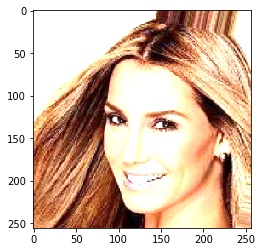

In [18]:
plt.imshow(data.val_ds.denorm(to_np(x))[0]*1.4);

In [19]:
sz=64

In [20]:
data = get_data(sz)

In [21]:
data = data.resize(int(sz*1.3), 'tmp')

In [22]:
learn = ConvLearner.pretrained(f_model, data, metrics=metrics)

In [23]:
lrf=learn.lr_find()

epoch      trn_loss   val_loss   f2         
    0      0.601389   0.455923   0.649926  



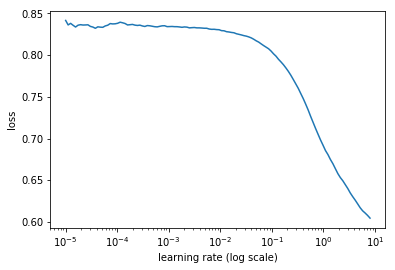

In [24]:
learn.sched.plot(n_skip=0, n_skip_end=0)

In [25]:
lr = 0.2

In [26]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.407727   0.354118   0.699874  
    1      0.367759   0.33981    0.716668  
    2      0.352589   0.337114   0.719008  
    3      0.352022   0.333865   0.724423  
    4      0.346026   0.330743   0.725606  
    5      0.341864   0.329588   0.726391  
    6      0.340877   0.329062   0.726871  



[array([0.32906]), 0.7268709227658269]

In [27]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.341351   0.329345   0.727075  
    1      0.336508   0.328106   0.726206  
    2      0.336642   0.326984   0.727892  
    3      0.337259   0.327401   0.726148  
    4      0.336938   0.324624   0.730401  
    5      0.333796   0.32466    0.729329  
    6      0.332081   0.324272   0.7306    



[array([0.32427]), 0.7305996128212839]

In [28]:
lrs = np.array([lr/9,lr/3,lr])

In [29]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.330812   0.305789   0.744161  
    1      0.302062   0.283192   0.761538  
    2      0.280741   0.274796   0.769648  
    3      0.279206   0.26906    0.772259  
    4      0.26652    0.264567   0.778484  
    5      0.25386    0.25966    0.78165   
    6      0.246436   0.259052   0.781121  



[array([0.25905]), 0.7811206296780174]

In [30]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.250764   0.258735   0.781257  
    1      0.250933   0.2605     0.776657  
    2      0.23869    0.257165   0.780954  
    3      0.243834   0.266889   0.770679  
    4      0.233307   0.258935   0.778703  
    5      0.222931   0.257391   0.781797  
    6      0.213657   0.256602   0.78173   



[array([0.2566]), 0.7817300993568178]

In [31]:
learn.save(f'short_{sz}')

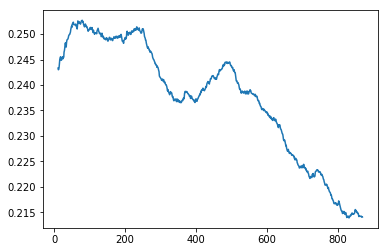

In [32]:
learn.sched.plot_loss()

In [33]:
sz=128

In [34]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.323885   0.309456   0.741141  
    1      0.311921   0.299855   0.75134   
    2      0.306992   0.298253   0.752664  
    3      0.303872   0.29417    0.756961  
    4      0.301504   0.292089   0.75919   
    5      0.29776    0.291296   0.759654  
    6      0.294923   0.291255   0.759344  



[array([0.29126]), 0.7593438731731113]

In [35]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'short_{sz}')

epoch      trn_loss   val_loss   f2         
    0      0.259835   0.246621   0.793892  
    1      0.247055   0.237158   0.801101  
    2      0.230705   0.232241   0.80484   
    3      0.232016   0.235424   0.803304  
    4      0.220426   0.227792   0.808369  
    5      0.208803   0.22552    0.810194  
    6      0.201313   0.224689   0.810705  



In [36]:
sz=224

In [37]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.263924   0.258101   0.782083  
    1      0.259099   0.253951   0.7867    
    2      0.252361   0.252      0.788095  
    3      0.2525     0.251173   0.787326  
    4      0.25094    0.249559   0.791497  
    5      0.2472     0.248856   0.790777  
    6      0.246104   0.248016   0.790977  



[array([0.24802]), 0.7909772579337665]

In [38]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'short_{sz}')

epoch      trn_loss   val_loss   f2         
    0      0.230752   0.224719   0.812291  
    1      0.223297   0.229827   0.808662  
    2      0.206951   0.217768   0.818596  
    3      0.211883   0.222419   0.814712  
    4      0.199447   0.21958    0.817424  
    5      0.186844   0.215907   0.818044  
    6      0.17918    0.215956   0.818027  



In [39]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

In [40]:
f2(preds,y)

0.8197731486511297